In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

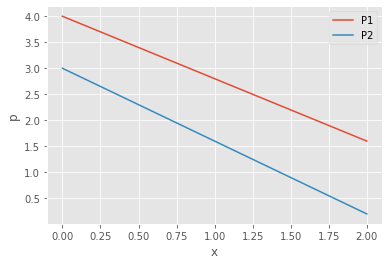

In [6]:
# peak inverse demand
P1 = lambda x1: 4 - 1.2 *x1
P2 = lambda x2: 3 - 1.4 * x2

xs = np.linspace(0,2,50)
P1s = P1(xs)
P2s = P2(xs)
plt.plot(xs,P1s,label="P1")
plt.plot(xs,P2s,label="P2")
plt.ylabel("p")
plt.xlabel("x")
plt.legend()

# The problem
Maximize total ridership, subject to a constraint: that profit be greater than or equal to zero (i.e., a break-even constraint).


Let $k$ stand for capacity of the system.


$$
\begin{split}
\max_{x_1,x_2,k} x_1 + x_2 \\
\text{s.t.    }   0 \leq k-x_1 \\
  0 \leq k - x_2 \\
  0 \leq \pi
\end{split}
$$

Profit constraint:
$$
\pi \geq 0
$$

$$
TR = x_1 P_1(x_1) + x_2 P_2(x_2)
$$
$$
C = c_x\cdot (x_1 + x_2) + c_k k
$$

$$
\pi = TR - TC =  x_1 P_1(x_1) + x_2 P_2(x_2) - \left( c_x\cdot (x_1 + x_2) + c_k k \right)
$$

Capacity constraints:
$$
x_1 \leq k
$$
$$
x_2 \leq k
$$


We have three decision variables: $x_1$,$x_2$ and $k$.




In [12]:
f = lambda x1,x2: x1 + x2

cx = 0.2
ck = 1.1
P1 = lambda x1: 4 - 1.2 *x1
P2 = lambda x2: 3 - 1.4 * x2
TR = lambda x1,x2: x1*P1(x1) + x2*P2(x2)
C = lambda x1,x2,k: cx*(x1+x2) + ck*k
π = lambda x1,x2,k: TR(x1,x2) - C(x1,x2,k)

def fun(x):
    x1,x2,k = x
    return np.array([
       k-x1, 
       k-x2,
       π(x1,x2,k)
    ])

constraints = {
    'type':'ineq',
    'fun': fun
}

res = opt.minimize(lambda x: -f(x[0],x[1]), constraints=constraints, x0=(1.0,1.0,1.0))

In [13]:
res

     fun: -4.250350153789494
     jac: array([-1., -1.,  0.])
 message: 'Optimization terminated successfully'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.26941912, 1.98093103, 2.26941912])

In [14]:
x1,x2,k = res.x
print("x1 = {:.2f} x2={:.2f} k={:.2f} P1={:.2f} P2={:.2f} ".format(x1,x2,k,P1(x1),P2(x2)))
# P1(res.x[])

x1 = 2.27 x2=1.98 k=2.27 P1=1.28 P2=0.23 


In [11]:
π(x1,x2,k)

-1.6765540067353868e-09